In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [3]:
# load data
df = pd.read_csv('/content/drive/MyDrive/S5/Data Mining/Project Akhir - DM/data_balita.csv')
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [4]:
df.shape

(120999, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [6]:
df['Status Gizi'].value_counts()

,count
Status Gizi,
normal,67755
severely stunted,19869
tinggi,19560
stunted,13815


# Cleaning Data

In [7]:
df.duplicated().sum()

81574

In [8]:
duplikat = df[df.duplicated()]
duplikat

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
6012,3,laki-laki,62.1,normal
6014,3,laki-laki,59.2,normal
6027,3,laki-laki,61.4,normal
6031,3,laki-laki,71.0,tinggi
6032,3,laki-laki,51.5,severely stunted
...,...,...,...,...
120994,60,perempuan,100.6,normal
120995,60,perempuan,98.3,stunted
120996,60,perempuan,121.3,normal
120997,60,perempuan,112.2,normal


In [9]:
df_cleaned = df.drop_duplicates()
df_cleaned

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120959,60,perempuan,100.700000,normal
120967,60,perempuan,113.700000,normal
120968,60,perempuan,107.500000,normal
120972,60,perempuan,127.600000,tinggi


In [10]:
df_cleaned.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [11]:
df_cleaned.isnull().sum()

,0
Umur (bulan),0
Jenis Kelamin,0
Tinggi Badan (cm),0
Status Gizi,0


In [12]:
df_cleaned.shape

(39425, 4)

In [13]:
df_cleaned['Status Gizi'].value_counts()

,count
Status Gizi,
normal,21514
tinggi,6974
severely stunted,6520
stunted,4417


# Exploratory Data Analysis

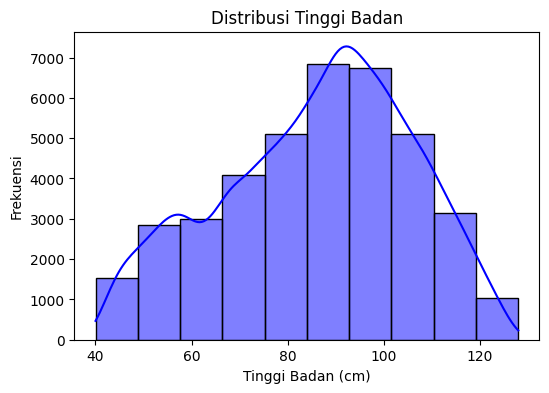

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(data=df_cleaned, x='Tinggi Badan (cm)', bins=10, kde=True, color='b')

plt.title('Distribusi Tinggi Badan')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Frekuensi')
plt.show()

In [15]:
fig=px.sunburst(df_cleaned, path=['Jenis Kelamin', 'Status Gizi'], values=df_cleaned.value_counts().values, color_discrete_sequence=['#718EA4', '#042037'])
fig.show()

# Preparation Data

In [16]:
from sklearn.preprocessing import LabelEncoder

jk_encoder = LabelEncoder()

df_cleaned['Jenis Kelamin'] = jk_encoder.fit_transform(df_cleaned['Jenis Kelamin'])

# mengkodekan status gizi dari yang status stunting paling parah adalah 0 sampai ke tinggi badan diatas rata-rata adalah 3
df_cleaned['Status Gizi'] = df_cleaned['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})

<ipython-input-16-e93ae81f7a2e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-e93ae81f7a2e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
df_cleaned.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,1
1,0,0,56.705203,3
2,0,0,46.863358,2
3,0,0,47.508026,2
4,0,0,42.743494,0


In [18]:
X = df_cleaned.drop(columns=['Status Gizi'])
y = df_cleaned['Status Gizi']

print('X :', X.shape)
print('y :', y.shape)

X : (39425, 3)
y : (39425,)


In [19]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [20]:
# split data dengan rasio 80 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling & Evaluation

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

decision_tree_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Akurasi Model Decision Tree : {:.2f}%'.format(decision_tree_acc * 100))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1330
           1       0.96      0.96      0.96       838
           2       0.99      0.99      0.99      4339
           3       0.99      0.98      0.99      1378

    accuracy                           0.99      7885
   macro avg       0.98      0.98      0.98      7885
weighted avg       0.99      0.99      0.99      7885

Akurasi Model Decision Tree : 98.74%


# Testing

In [41]:
new_data = pd.DataFrame({
    'Umur (bulan)' : [20],
    'Jenis Kelamin' : ["Perempuan"],
    'Tinggi Badan (cm)' : [76.2]
})

In [42]:
new_data['Jenis Kelamin'] = jk_encoder.fit_transform(new_data['Jenis Kelamin'])

In [43]:
new_data_scaled = scaler.transform(new_data)
prediction = clf.predict(new_data_scaled)
print('Status Gizi :', prediction[0])

Status Gizi : 1
